### Procedure Structure

Building a Deep Neural Network for solving machine learning tasks involves several steps:

1. **Load and preprocess data**
2. **Define model architecture**
3. **Select optimizer and cost function**
4. **Train the model**
5. **Evaluate performance on test data**
6. **Adjust hyperparameters for optimization**

In [21]:
!pip install keras==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 14.2 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 2.12.0 which is incompatible.


### Data preprosessing

### Summary: MNIST Dataset

- **Dataset**: MNIST consists of 70,000 handwritten digits.
- **Image Format**: Each digit is presented as a 28×28 pixel grid.
- **Pixel Values**: The grayscale pixels range from 0 to 255.
- **Classification Task**: With 10 categories corresponding to the ten digits.

In [1]:
from keras.datasets import mnist

# Load the MNIST dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Get the shapes of the components
print("Training set images shape:", X_train.shape)
print("Training set labels shape:", Y_train.shape)
print("Test set images shape:", X_test.shape)
print("Test set labels shape:", Y_test.shape)


Training set images shape: (60000, 28, 28)
Training set labels shape: (60000,)
Test set images shape: (10000, 28, 28)
Test set labels shape: (10000,)


In [2]:
X_test[9]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         36,  56, 137, 201, 199,  95,  37,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  45, 152,
        234, 254, 254, 254, 254, 254, 250, 211, 151,   6,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  46, 153, 240, 254,
        254, 227, 166, 133, 251, 200, 254, 229, 225, 104,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 153, 234, 254, 254, 187,
        142,   8,   0,   0, 191,  40, 198, 246, 223, 253,  21,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   8, 126, 253, 254, 233, 128,  11,
          0,   0,   0,   0, 210,  43,  70, 254, 254, 254,  21,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  72, 243, 254, 228,  54,   0,   0,
          0,   0,   3,  32, 116, 225, 242, 254, 255, 162,   5,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  75, 240, 254, 223, 109, 138, 178,
        178, 169, 210, 251, 231, 254, 254, 254, 232,  38,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   9, 175, 244, 253, 255, 254, 254,
        251, 254, 254, 254, 254, 254, 252, 171,  25,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  16, 136, 195, 176, 146,
        153, 200, 254, 254, 254, 254, 150,  16,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 162, 254, 254, 241,  99,   3,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        118, 250, 254, 254,  90,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 100,
        242, 254, 254, 211,   7,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  54, 241,
        254, 254, 242,  59,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 131, 254,
        254, 244,  64,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  13, 249, 254,
        254, 152,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  12, 228, 254, 254,
        208,   8,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  78, 255, 254, 254,
         66,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [3]:
Y_test[9]

9

In [4]:
# reshaping

img_rows, img_cols = 28, 28 # number of pixels

# reshape data, depending on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

print("Training set images shape:", X_train.shape)
print("Training set labels shape:", Y_train.shape)
print("Test set images shape:", X_test.shape)
print("Test set labels shape:", Y_test.shape)


Training set images shape: (60000, 784)
Training set labels shape: (60000,)
Test set images shape: (10000, 784)
Test set labels shape: (10000,)


In [5]:
# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

an example of a data point with label 4


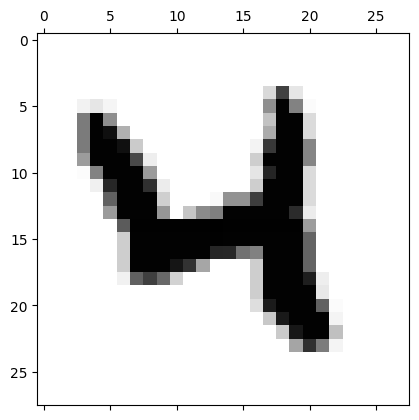

In [6]:
import keras,sklearn
import matplotlib.pyplot as plt

num_classes = 10 # 10 digits

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

In [7]:
# convert class vec class matricestors to binary
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 784)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [8]:
# X_test[9]

In [9]:
Y_test[9]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

### Constructing the Deep Neural Network (DNN)

Use the `Sequential()` class to add layers one by one.

- Instantiate a `Sequential()` model named `model`.
- Use the `add()` method to attach layers.
- For simplicity, focus on `Dense` layers.
- Specify the number of neurons and activation functions.
- Ensure input and output neuron counts match.
- Define input shape in the first layer.
- Keras will infer dimensions for subsequent layers.
- Only specify output layer size for softmax.

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D


def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(200,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))

    return model

print('DNN Model created successfully!')

DNN Model created successfully!


In [11]:
def compile_model(optimizer=keras.optimizers.Adam()):
    # create the mode
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [12]:
# training parameters
batch_size = 64
epochs = 10

# create the deep neural net
model_DNN=compile_model()

# train DNN and store training info in history
history=model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/10
938/938 [==============================] - 6s 5ms/step - loss: 0.3538 - accuracy: 0.8947 - val_loss: 0.1387 - val_accuracy: 0.9575
Epoch 2/10
938/938 [==============================] - 5s 6ms/step - loss: 0.1480 - accuracy: 0.9568 - val_loss: 0.0914 - val_accuracy: 0.9701
Epoch 3/10
938/938 [==============================] - 6s 6ms/step - loss: 0.1048 - accuracy: 0.9692 - val_loss: 0.0799 - val_accuracy: 0.9755
Epoch 4/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0812 - accuracy: 0.9757 - val_loss: 0.0778 - val_accuracy: 0.9776
Epoch 5/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0680 - accuracy: 0.9792 - val_loss: 0.0752 - val_accuracy: 0.9779
Epoch 6/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0574 - accuracy: 0.9826 - val_loss: 0.0742 - val_accuracy: 0.9788
Epoch 7/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0486 - accuracy: 0.9847 - val_loss: 0.0755 - val_accuracy: 0.9783
Epoch 

313/313 [==============================] - 1s 3ms/step - loss: 0.0871 - accuracy: 0.9772

Test loss: 0.08707169443368912
Test accuracy: 0.9771999716758728


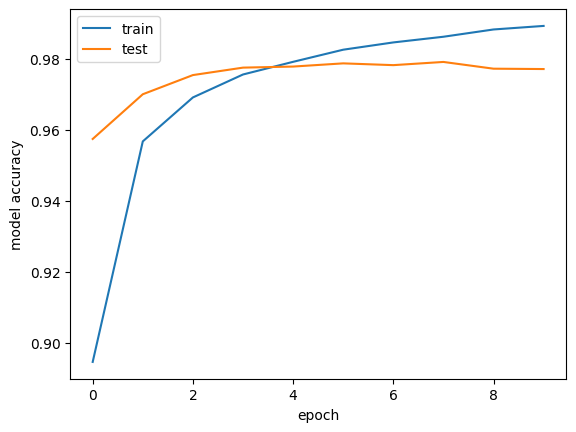

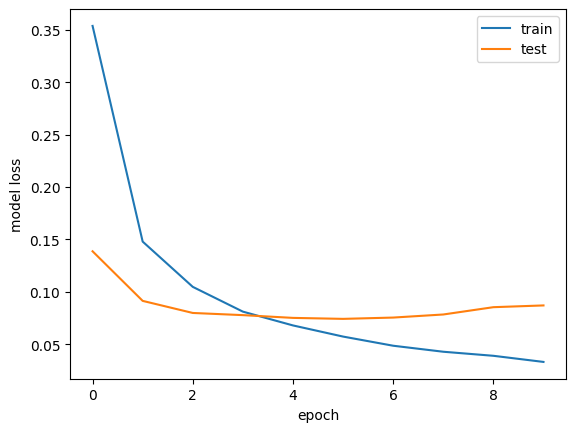

In [13]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# Grid search option of scikit-learn to optimize the hyperparameters of our model

In [14]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

# call Keras scikit wrapper
model_gridsearch = KerasClassifier(build_fn=compile_model,
                        epochs=1,
                        batch_size=batch_size,
                        verbose=1)

# list of allowed optional arguments for the optimizer, see `compile_model()`
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
# define parameter dictionary
param_grid = dict(optimizer=optimizer)
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(X_train,Y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


<ipython-input-14-061c79d699a5>:5: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_gridsearch = KerasClassifier(build_fn=compile_model,


938/938 [==============================] - 8s 7ms/step - loss: 0.3510 - accuracy: 0.8963
Best: 0.950900 using {'optimizer': 'Nadam'}
0.863400 (0.008362) with: {'optimizer': 'SGD'}
0.949250 (0.002269) with: {'optimizer': 'RMSprop'}
0.745150 (0.006869) with: {'optimizer': 'Adagrad'}
0.145433 (0.005766) with: {'optimizer': 'Adadelta'}
0.950500 (0.000867) with: {'optimizer': 'Adam'}
0.924650 (0.003070) with: {'optimizer': 'Adamax'}
0.950900 (0.002529) with: {'optimizer': 'Nadam'}


# CNN

In [15]:
import keras,sklearn
# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    # add 2D pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # add second convolutional layer with 20 filters
    model.add(Conv2D(20, (5, 5), activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # add 2D pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # flatten data
    model.add(Flatten())
    # add a dense all-to-all relu layer
    model.add(Dense(20*4*4, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))

    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='Adam',
                  metrics=['accuracy'])

    return model

    print('CNN Model created successfully!')

In [17]:
# training parameters
batch_size = 64
epochs = 10

# create the deep conv net
model_CNN=create_CNN()

# train CNN
model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
938/938 [==============================] - 33s 34ms/step - loss: 0.2558 - accuracy: 0.9199 - val_loss: 0.0867 - val_accuracy: 0.9804
Epoch 2/10
938/938 [==============================] - 45s 48ms/step - loss: 0.0981 - accuracy: 0.9701 - val_loss: 0.0524 - val_accuracy: 0.9871
Epoch 3/10
938/938 [==============================] - 33s 35ms/step - loss: 0.0735 - accuracy: 0.9773 - val_loss: 0.0427 - val_accuracy: 0.9896
Epoch 4/10
938/938 [==============================] - 32s 34ms/step - loss: 0.0636 - accuracy: 0.9802 - val_loss: 0.0367 - val_accuracy: 0.9908
Epoch 5/10
938/938 [==============================] - 31s 33ms/step - loss: 0.0551 - accuracy: 0.9830 - val_loss: 0.0353 - val_accuracy: 0.9901
Epoch 6/10
938/938 [==============================] - 31s 33ms/step - loss: 0.0489 - accuracy: 0.9848 - val_loss: 0.0313 - val_accuracy: 0.9915
Epoch 7/10
938/938 [==============================] - 31s 33ms/step - loss: 0.0446 - accuracy: 0.9858 - val_loss: 0.0289 - val_accuracy: